In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [53]:
df = pd.read_excel('netflix_titles.xlsx')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [55]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [56]:

df.fillna({'director':'Unknown'}, inplace=True)

df.fillna({'cast':'Unknown'}, inplace=True)

df.fillna({'country':'Unknown'}, inplace=True)

df.fillna({'date_added':'2000-01-01'}, inplace=True)

df.fillna({'rating':'Not Rated'}, inplace=True)

df.fillna({'duration':'No Duration specified'}, inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'])






In [57]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

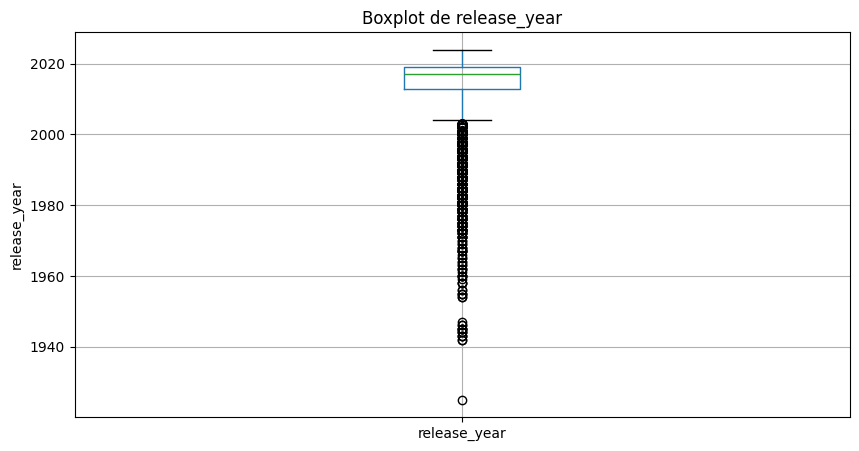

In [58]:
def graficos_boxplot(df):
	  
	  # Selecciona solo las columnas numéricas
    df_numerico = df.select_dtypes('number')
    
    # Itera sobre cada columna numérica
    for columna in df_numerico.columns:
        plt.figure(figsize=(10, 5))
        df.boxplot(column=columna)
        plt.title(f'Boxplot de {columna}')
        plt.ylabel(columna)
        plt.show()
        

graficos_boxplot(df)

In [59]:
df.country.value_counts()

country
United States                             2819
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

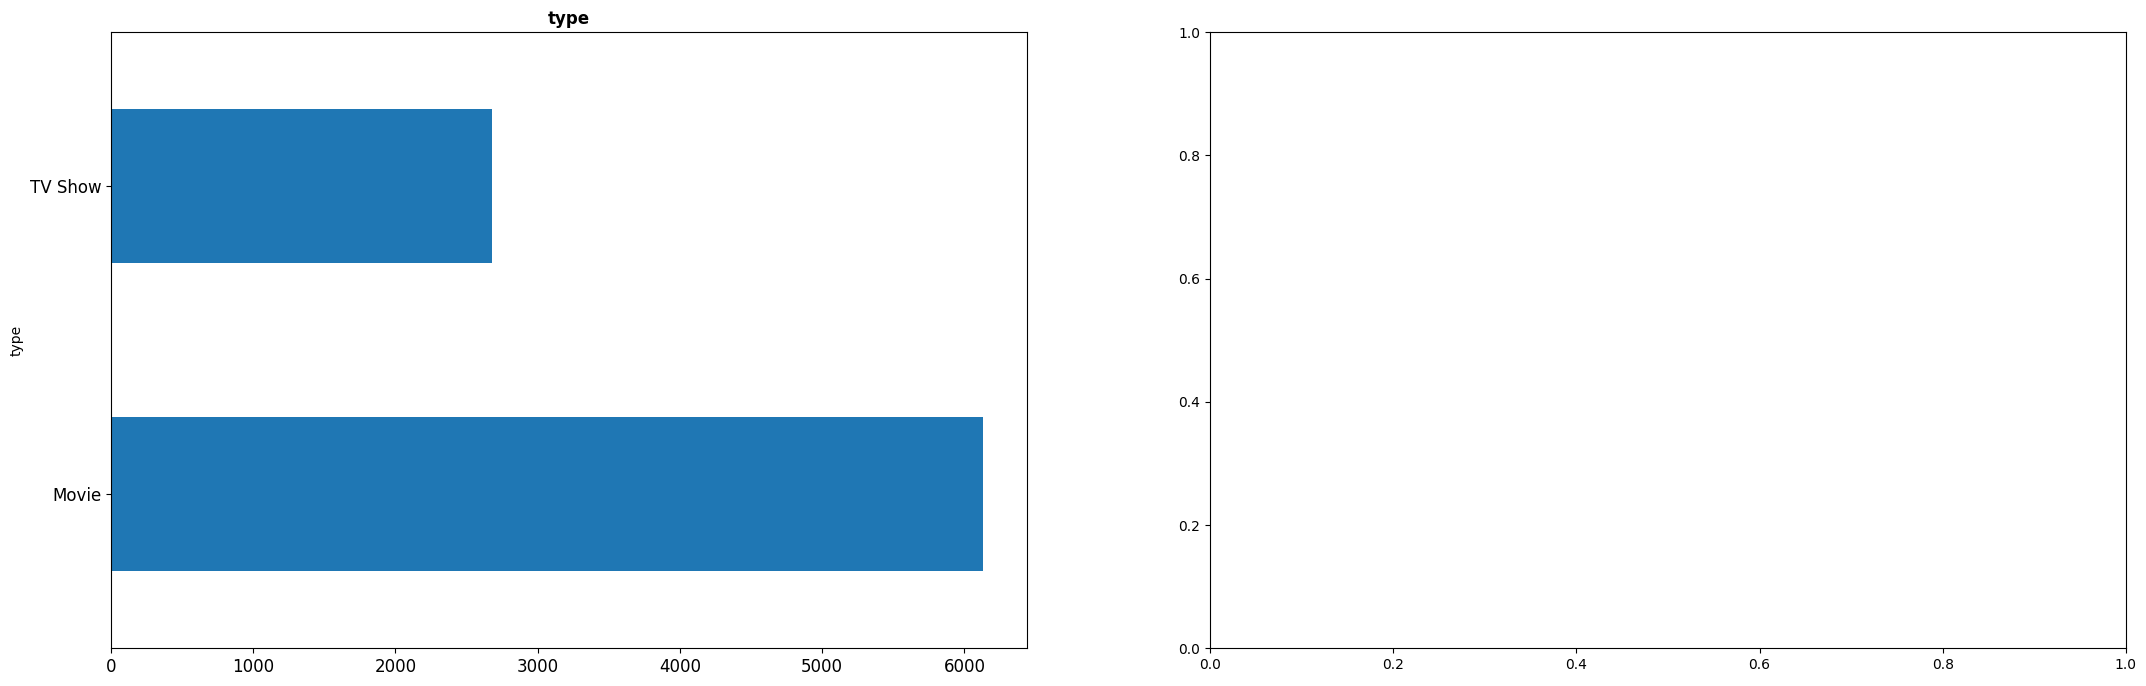

In [60]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (26, filas * 8))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O').loc[:,['type']])

type
Movie      6132
TV Show    2677
Name: count, dtype: int64


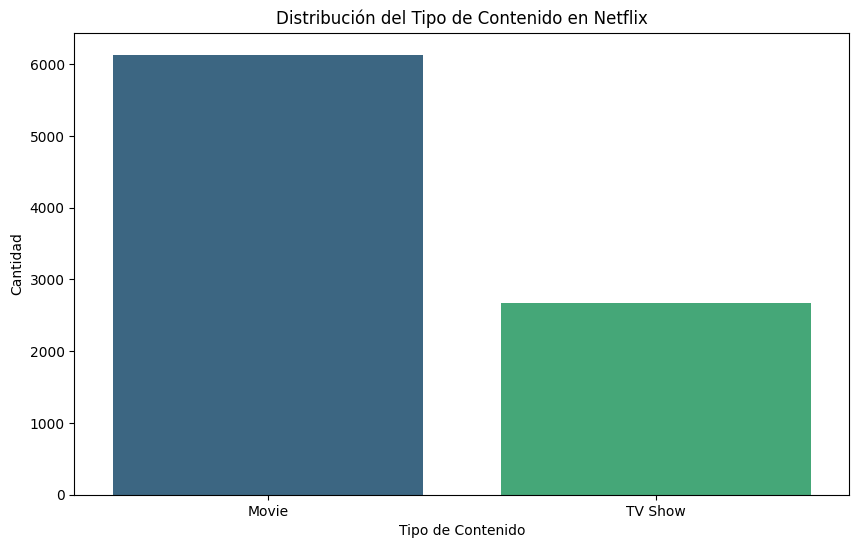

In [61]:
type_counts = df['type'].value_counts()
print(type_counts)

movies = df[df.type == 'Movie']
tv_shows = df[df.type == 'TV Show']

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis', hue='type', dodge=False, legend=False)
plt.title('Distribución del Tipo de Contenido en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()


In [62]:
df.country.value_counts()

country
United States                             2819
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

country
United States     2752
India              962
United Kingdom     532
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Egypt              102
Hong Kong          100
Nigeria             94
Australia           94
Indonesia           86
Turkey              83
Philippines         80
Belgium             78
Italy               75
Name: count, dtype: int64
country
United States     938
Unknown           391
United Kingdom    272
Japan             199
South Korea       171
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Mexico             58
China              48
Germany            44
Colombia           32
Brazil             31
Turkey             30
Italy              25
Thailand           24
Singapore          23
Name: count, dtype: int64


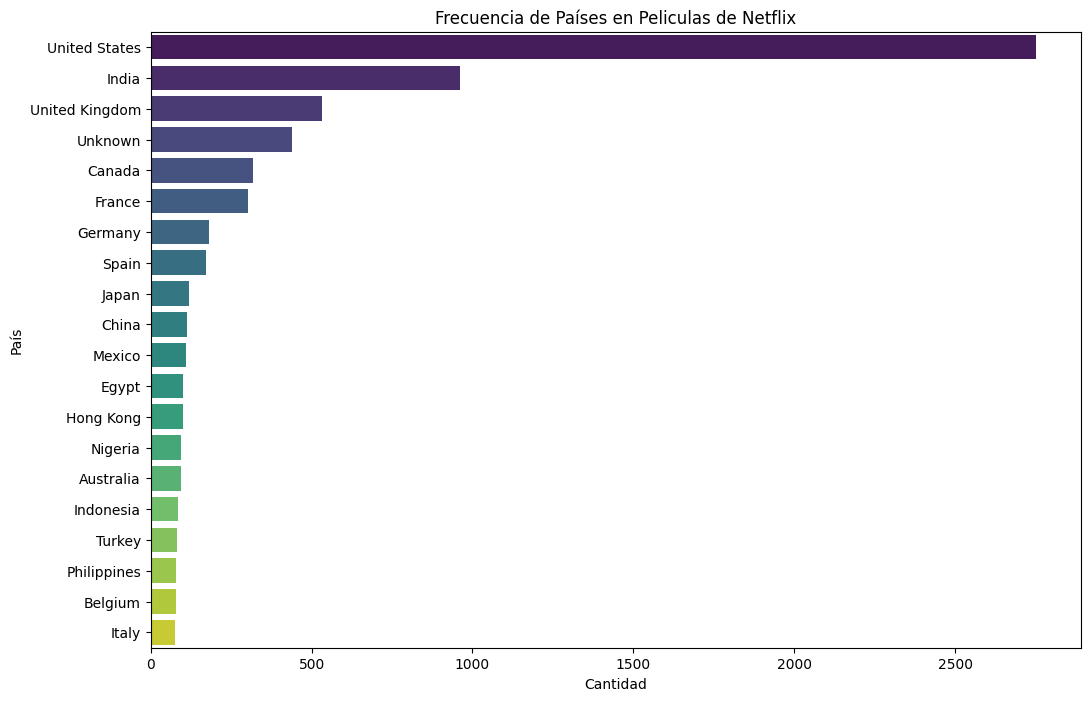

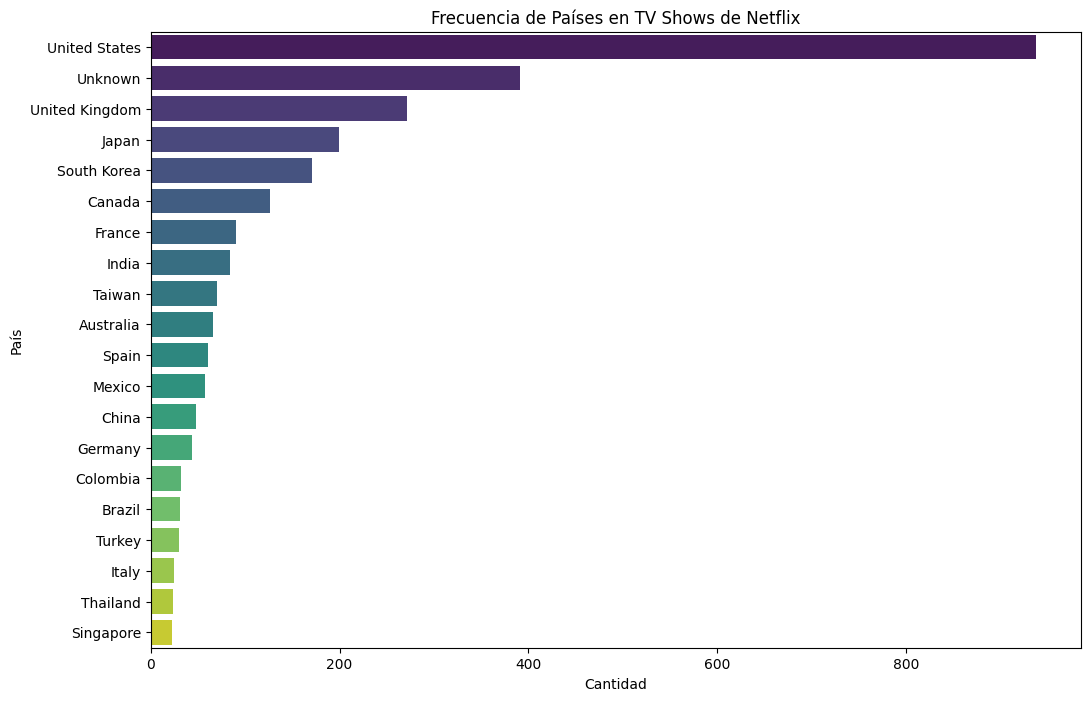

In [118]:
movies_countries = movies['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)
tvshows_countries = tv_shows['country'].str.split(', ').explode().value_counts().sort_values(ascending=False)

print(movies_countries.sort_values(ascending=False).head(20))
print(tvshows_countries.sort_values(ascending=False).head(20))

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_countries.index[:20], x=movies_countries.values[:20], hue=movies_countries.index[:20]  ,dodge=False, palette='viridis')
plt.title('Frecuencia de Países en Peliculas de Netflix')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_countries.index[:20], x=tvshows_countries.values[:20], hue=tvshows_countries.index[:20], dodge=False, palette='viridis')
plt.title('Frecuencia de Países en TV Shows de Netflix')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend([],[], frameon=False)
plt.show()

rating
TV-MA        2062
TV-14        1427
R             797
TV-PG         540
PG-13         490
PG            287
TV-Y7         139
TV-Y          131
TV-G          126
NR             75
G              41
TV-Y7-FV        5
NC-17           3
UR              3
Not Rated       2
74 min          1
84 min          1
66 min          1
A               1
Name: count, dtype: int64
rating
TV-MA        1146
TV-14         733
TV-PG         323
TV-Y7         195
TV-Y          176
TV-G           94
NR              5
R               2
Not Rated       2
TV-Y7-FV        1
Name: count, dtype: int64


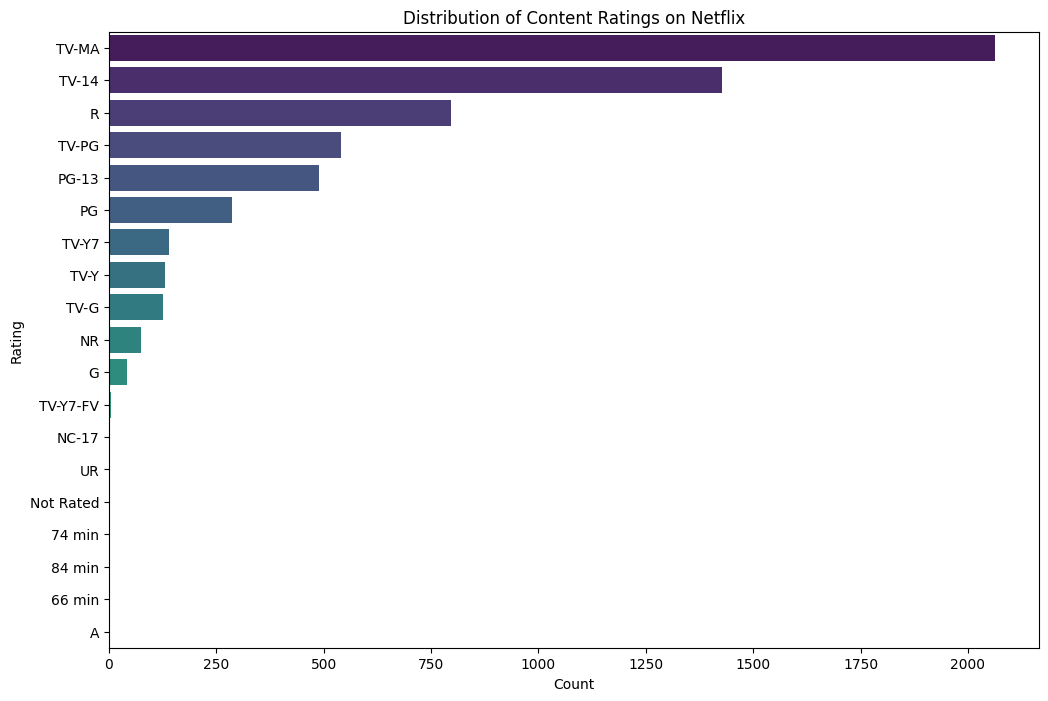

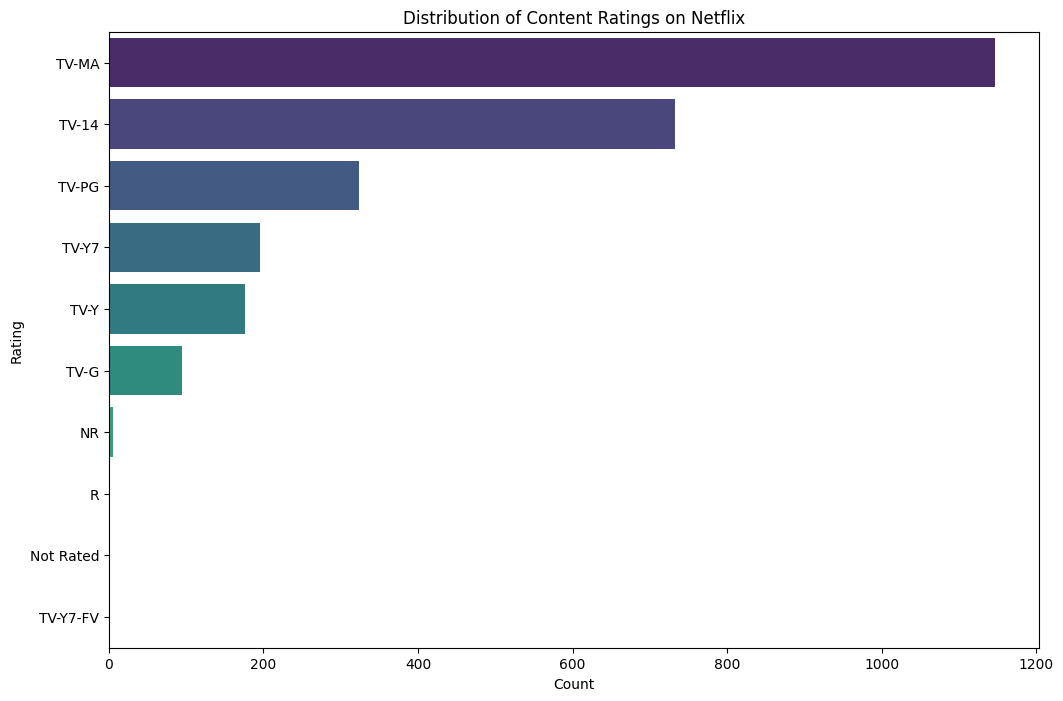

In [121]:
movies_rating_counts = movies['rating'].value_counts()
tvshows_rating_counts = tv_shows['rating'].value_counts()
print(movies_rating_counts)
print(tvshows_rating_counts)

plt.figure(figsize=(12, 8))
sns.barplot(y=movies_rating_counts.index, x=movies_rating_counts.values, hue=movies_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(y=tvshows_rating_counts.index, x=tvshows_rating_counts.values, hue=tvshows_rating_counts.index, dodge=False, palette='viridis')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

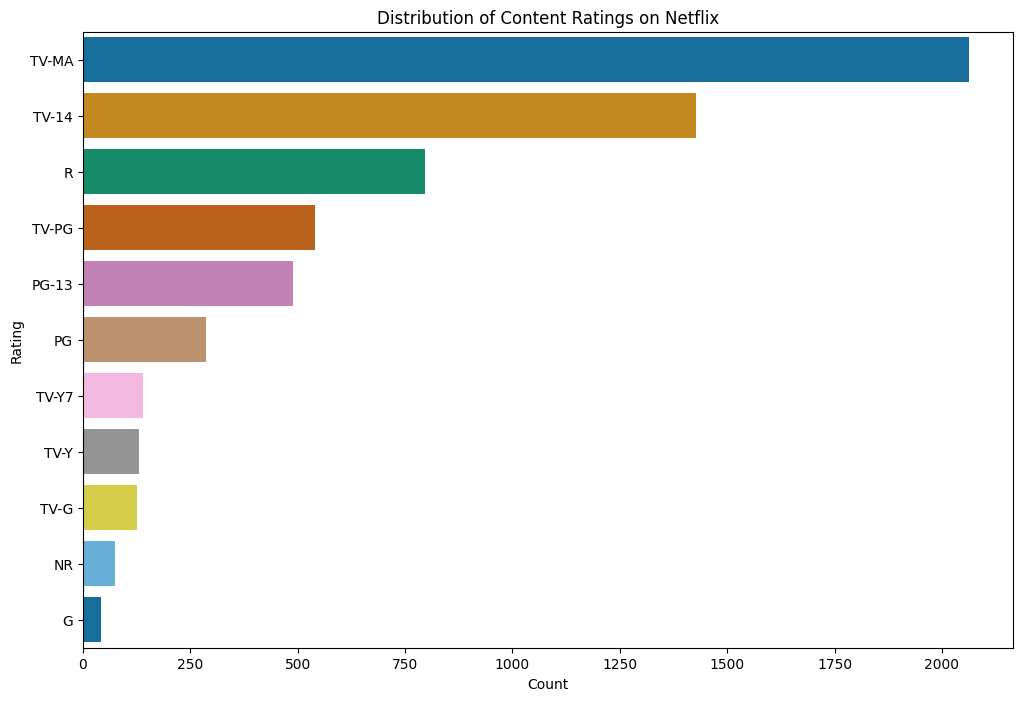

In [122]:
plt.figure(figsize=(12, 8))
sns.barplot(y=movies_rating_counts.index[:11], x=movies_rating_counts.values[:11], hue=movies_rating_counts.index[:11], dodge=False, palette='colorblind')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.legend([],[], frameon=False)
plt.show()

In [66]:
df.duration.value_counts()

duration
1 Season     1794
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

C:\Users\juana\AppData\Local\Temp\ipykernel_12884\3310880701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = movies['duration'].apply(lambda x: int(x.split()[0]) if x.split()[0] != 'No' else 0)


duration
1 Season      1794
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64


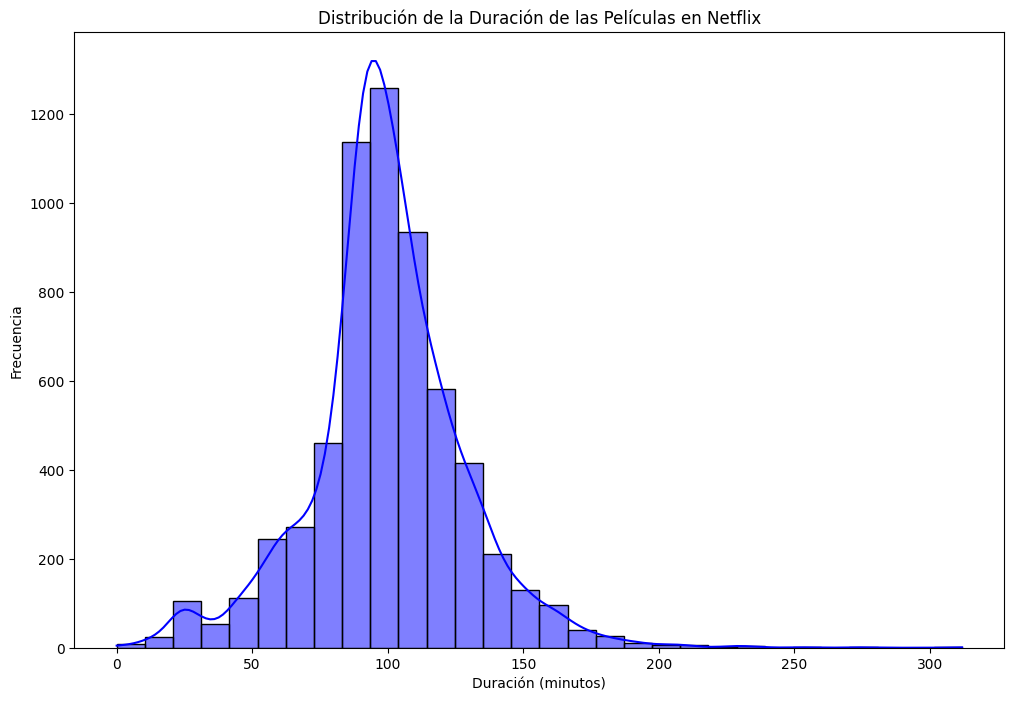

C:\Users\juana\AppData\Local\Temp\ipykernel_12884\3310880701.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='viridis')


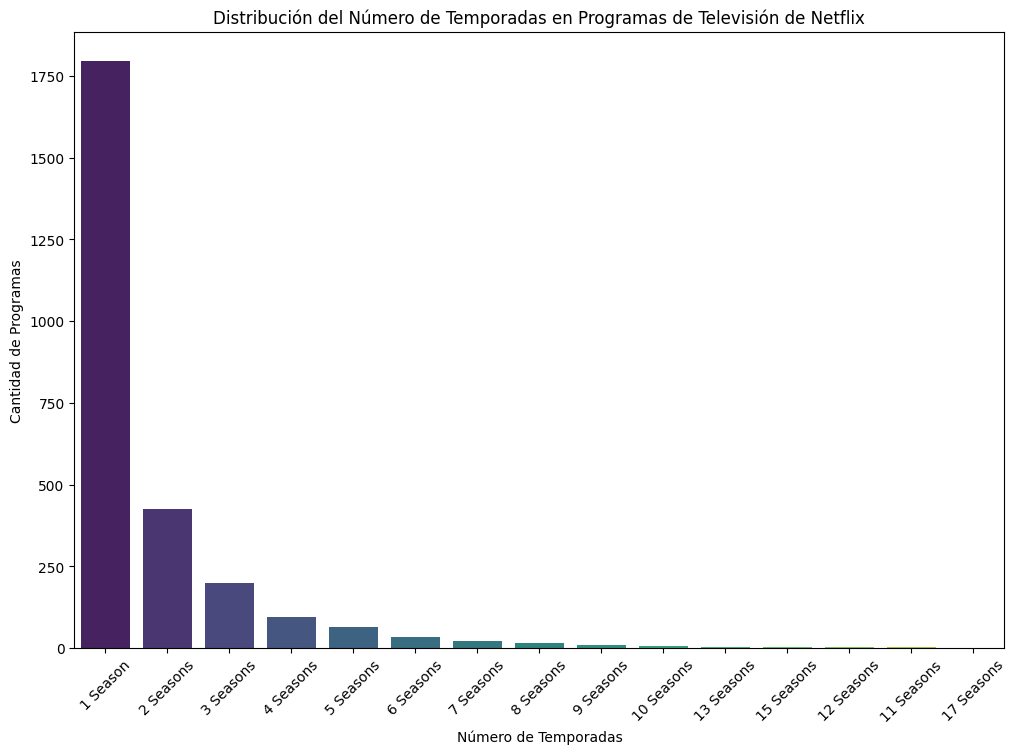

In [123]:

movies['duration_num'] = movies['duration'].apply(lambda x: int(x.split()[0]) if x.split()[0] != 'No' else 0)


movies_duration = movies['duration_num']
seasons_counts = tv_shows['duration'].value_counts().sort_values(ascending=False)

print(seasons_counts)


plt.figure(figsize=(12, 8))
sns.histplot(movies_duration, kde=True, color='blue', bins=30)
plt.title('Distribución de la Duración de las Películas en Netflix')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(12, 8))
sns.barplot(x=seasons_counts.index, y=seasons_counts.values, palette='viridis')
plt.title('Distribución del Número de Temporadas en Programas de Televisión de Netflix')
plt.xlabel('Número de Temporadas')
plt.xticks(rotation=45)  
plt.ylabel('Cantidad de Programas')
plt.show()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2018    1147
2019    1030
2020     953
2021     592
2024       1
Name: count, Length: 75, dtype: int64


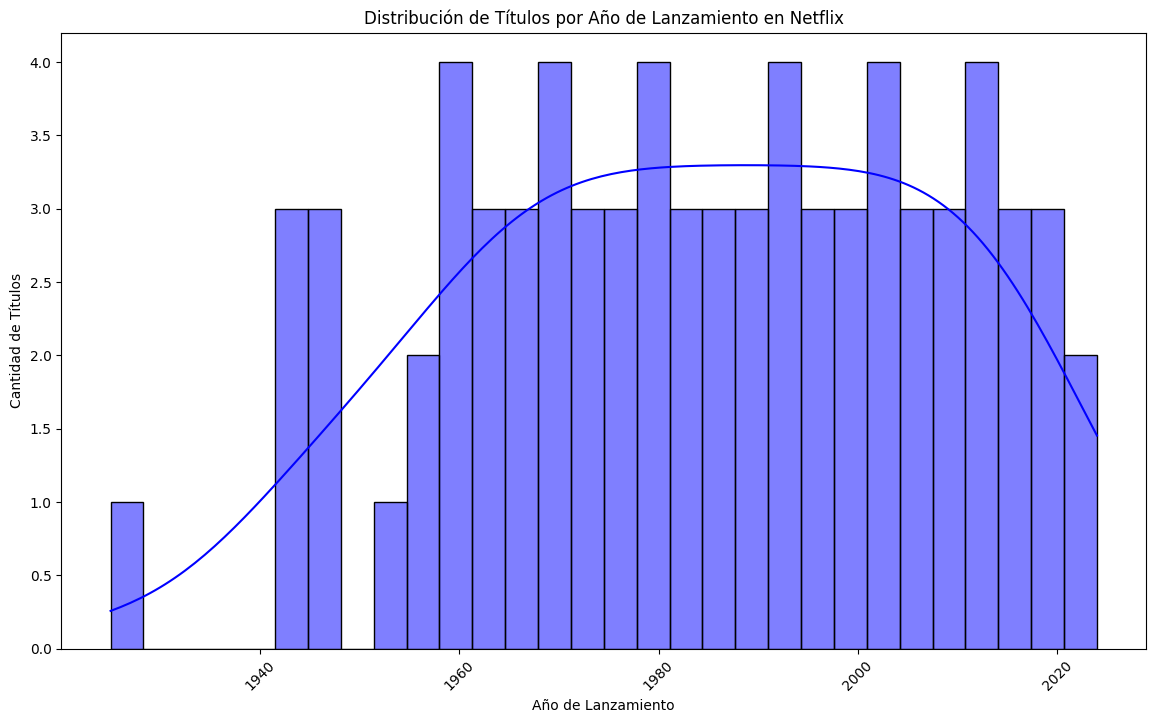

In [91]:
release_year_counts = df['release_year'].value_counts().sort_index()
print(release_year_counts)

# Visualización de la distribución de títulos por año de lanzamiento
plt.figure(figsize=(14, 8))
sns.histplot(x=release_year_counts.index, kde=True, color='blue', bins=30)
plt.title('Distribución de Títulos por Año de Lanzamiento en Netflix')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.show()